In [264]:
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [265]:
def addDateIndex(df, maxDate = None, minDate = None, fill_value = 0):
    #minDate = SP_Day['delivered'].min()
    if(maxDate == None):
        maxDate = df['date'].max()
        
    if(minDate == None):
        minDate = df['date'].min()

    idx = pd.date_range(minDate, maxDate)


    df = df.set_index('date')
    df.index = pd.DatetimeIndex(df.index)
    df = df.reindex(idx, fill_value=fill_value)
    return df


In [296]:

finishedItems = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/DeliveredItems.csv")
finishedItems.columns = ['date', 'finishedCount']
finishedItems = addDateIndex(finishedItems)
finishedItems = finishedItems['20190101':'20191101']
finishedItems['finished_cumsum'] = finishedItems['finishedCount'].cumsum()


finishedItems.loc[:, 'WEEKDAY'] = ((pd.DatetimeIndex(finishedItems.index).dayofweek) // 5 == 0).astype(float)
finishedItems.loc[finishedItems.index.isin(['2019-01-01', '2019-01-06', '2019-04-22', '2019-06-09', '2019-06-20', '2019-08-15',
               '2019-11-01', '2019-11-11', '2019-12-25', '2019-12-26']), 'WEEKDAY'] = 0




finishedItems.loc[:, 'day'] = 1
finishedItems.loc[:, 'day'] = finishedItems['day'].cumsum()
finishedItems.loc[:, 'work_day'] = finishedItems['WEEKDAY'].cumsum()
finishedItems['troughput'] = finishedItems['finished_cumsum'] / finishedItems['work_day']

finishedItems.head(10)

,finishedCount,finished_cumsum,WEEKDAY,day,work_day,troughput
2019-01-01,0,0,0.0,1,0.0,NaN
2019-01-02,0,0,1.0,2,1.0,0.000000
2019-01-03,0,0,1.0,3,2.0,0.000000
2019-01-04,0,0,1.0,4,3.0,0.000000
2019-01-05,0,0,0.0,5,3.0,0.000000
2019-01-06,0,0,0.0,6,3.0,0.000000
2019-01-07,1,1,1.0,7,4.0,0.250000
2019-01-08,0,1,1.0,8,5.0,0.200000
2019-01-09,0,1,1.0,9,6.0,0.166667
2019-01-10,0,1,1.0,10,7.0,0.142857


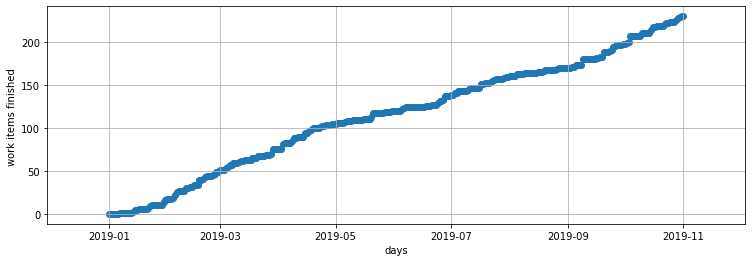

In [301]:
plt.scatter(finishedItems.index, finishedItems['finished_cumsum'])
plt.grid()

plt.xlabel('days')
_ = plt.ylabel('work items finished ')

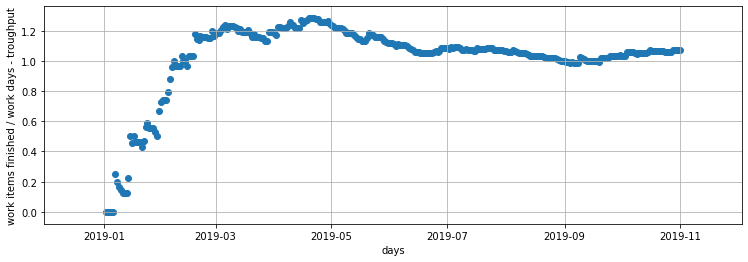

In [300]:
#plt.scatter(finishedItems.index, finishedItems['finished_cumsum'])
plt.scatter(finishedItems.index, finishedItems['troughput'])
plt.grid()

plt.xlabel('days')
_ = plt.ylabel('work items finished / work days - troughput')


In [267]:
finishedItemsJune = finishedItems['20190601':'20190630']
finishedItemsJune.loc[:, 'cumsum'] = finishedItemsJune['finishedCount'].cumsum()
finishedItemsJune.loc[:, 'WEEKDAY'] = ((pd.DatetimeIndex(finishedItemsJune.index).dayofweek) // 5 == 0).astype(float)
finishedItemsJune.loc[:, 'day'] = 1
finishedItemsJune.loc[:, 'day'] = finishedItemsJune['day'].cumsum()
finishedItemsJune.loc[:, 'work_day'] = finishedItemsJune['WEEKDAY'].cumsum()


finishedItemsJune

/miniconda3/envs/bayes-env/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/miniconda3/envs/bayes-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,finishedCount,cumsum,WEEKDAY,day,work_day
2019-06-01,0,0,0.0,1,0.0
2019-06-02,0,0,0.0,2,0.0
2019-06-03,0,0,1.0,3,1.0
2019-06-04,0,0,1.0,4,2.0
2019-06-05,2,2,1.0,5,3.0
2019-06-06,1,3,1.0,6,4.0
2019-06-07,1,4,1.0,7,5.0
2019-06-08,0,4,0.0,8,5.0
2019-06-09,0,4,0.0,9,5.0
2019-06-10,0,4,1.0,10,6.0


In [268]:
finishedItemsJuly = finishedItems['20190701':'20190731']
finishedItemsJuly.loc[:, 'cumsum'] = finishedItemsJuly['finishedCount'].cumsum()
finishedItemsJuly.loc[:, 'WEEKDAY'] = ((pd.DatetimeIndex(finishedItemsJuly.index).dayofweek) // 5 == 0).astype(float)
finishedItemsJuly.loc[:, 'day'] = 1
finishedItemsJuly.loc[:, 'day'] = finishedItemsJuly['day'].cumsum()
finishedItemsJuly.loc[:, 'work_day'] = finishedItemsJuly['WEEKDAY'].cumsum()


finishedItemsJuly

,finishedCount,cumsum,WEEKDAY,day,work_day
2019-07-01,1,1,1.0,1,1.0
2019-07-02,0,1,1.0,2,2.0
2019-07-03,3,4,1.0,3,3.0
2019-07-04,0,4,1.0,4,4.0
2019-07-05,2,6,1.0,5,5.0
2019-07-06,0,6,0.0,6,5.0
2019-07-07,0,6,0.0,7,5.0
2019-07-08,0,6,1.0,8,6.0
2019-07-09,0,6,1.0,9,7.0
2019-07-10,1,7,1.0,10,8.0


In [269]:
#real troughput
troughput_july = round(finishedItemsJuly.finishedCount.sum() / finishedItemsJuly.work_day.max(), 2) 
print('troughput in July', troughput_july)

troughput in July 0.96


In [270]:
finishedItemsJuly.loc[:, 'est_finished'] = finishedItemsJuly['work_day'] / troughput_july
finishedItemsJuly.head(48)

,finishedCount,cumsum,WEEKDAY,day,work_day,est_finished
2019-07-01,1,1,1.0,1,1.0,1.041667
2019-07-02,0,1,1.0,2,2.0,2.083333
2019-07-03,3,4,1.0,3,3.0,3.125000
2019-07-04,0,4,1.0,4,4.0,4.166667
2019-07-05,2,6,1.0,5,5.0,5.208333
2019-07-06,0,6,0.0,6,5.0,5.208333
2019-07-07,0,6,0.0,7,5.0,5.208333
2019-07-08,0,6,1.0,8,6.0,6.250000
2019-07-09,0,6,1.0,9,7.0,7.291667
2019-07-10,1,7,1.0,10,8.0,8.333333


In [271]:
wipObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/InProgressObservations.csv")
wipObservations.head()

wipObservations = addDateIndex(wipObservations)


wipObservations.tail(10)

,SP_count
2019-11-16,6
2019-11-17,6
2019-11-18,7
2019-11-19,6
2019-11-20,5
2019-11-21,6
2019-11-22,6
2019-11-23,5
2019-11-24,5
2019-11-25,6


In [281]:
wipObservationsJune = wipObservations['20190601':'20190630']
wipObservationsJune


,SP_count
2019-06-01,5
2019-06-02,5
2019-06-03,5
2019-06-04,4
2019-06-05,5
2019-06-06,7
2019-06-07,6
2019-06-08,6
2019-06-09,6
2019-06-10,6


In [ ]:
wipAvg = wipObservationsJune.SP_count.mean()
print('avg wip', wipAvg)

In [273]:
cycleObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/DaysInDev.csv")
cycleObservations.head()

,Unnamed: 0,key,days in dev,last move to dev,finish date
0,0,MROMD-2711,4.0,2019-05-27,2019-05-31
1,1,MROMD-2290,2.0,2019-01-31,2019-02-04
2,2,MROMD-2252,2.0,2019-01-31,2019-02-04
3,3,MROMD-2873,6.0,2019-10-02,2019-10-10
4,4,MROMD-2844,14.0,2019-09-20,2019-10-10


In [274]:

cycleObservations = cycleObservations[['finish date', 'days in dev', 'key']]
cycleObservations.columns = ['date', 'cycleTime', 'key']
cycleObservations = cycleObservations.sort_values(by=['date'])
#print (cycleObservations[cycleObservations.duplicated(subset=['date'],keep=False)])
#cycleObservations = addDateIndex(cycleObservations)
cycleObservations['date'] = pd.to_datetime(cycleObservations['date'])
cycleObservations.head()


,date,cycleTime,key
130,2019-01-14,6.0,MROMD-2137
140,2019-01-15,1.0,MROMD-2246
142,2019-01-15,4.0,MROMD-1177
141,2019-01-15,5.0,MROMD-1957
76,2019-01-23,5.0,MROMD-2250


In [275]:
cycleObservationsJune = cycleObservations.loc[(cycleObservations['date'] >= '2019-06-01') &
                                              (cycleObservations['date'] <= '2019-06-30'),]
cycleObservationsJune.loc[(cycleObservations.cycleTime == 0), 'cycleTime'] = 0.5
cycleObservationsJune

,date,cycleTime,key
95,2019-06-05,11.0,MROMD-2612
114,2019-06-06,0.5,MROMD-2715
122,2019-06-07,2.0,MROMD-2730
163,2019-06-19,0.5,MROMD-2758
131,2019-06-21,2.0,MROMD-2772
146,2019-06-24,0.5,MROMD-2775
147,2019-06-24,3.0,MROMD-2771
165,2019-06-25,0.5,MROMD-2776
166,2019-06-25,47.0,MROMD-2491
167,2019-06-27,3.0,MROMD-2774


In [276]:

# #cycleObservationsJune

# # observed cycle time for each day is needed
# # average cycle time for days where more than 1 item is delivered
# # for days where no item is delivered add an average cycle time from all observations

# #avgCycle = cycleObservationsJune['cycleTime'].mean()
# #cycleMedian = cycleObservationsJune['cycleTime'].median()
# avgCycle = finishedItemsJuly['cumsum'].max() / wipAvg / len(finishedItemsJuly)

# #velocity['SP2W'] =  velocity['SP'].shift().rolling(14, min_periods=14, center=False).sum()
cycleObservationsJune = cycleObservationsJune.groupby('date').agg({'cycleTime': ['mean']})
cycleObservationsJune.columns = [' '.join(col).strip() for col in cycleObservationsJune.columns.values]
cycleObservationsJune.reset_index(inplace=True)



minDate = wipObservationsJune.index.min()
maxDate = wipObservationsJune.index.max()


cycleObservationsJune = addDateIndex(cycleObservationsJune, maxDate = maxDate, minDate=minDate, fill_value=-1)
cycleObservationsJune.columns = ['cycleTime']
cycleObservationsJune


,cycleTime
2019-06-01,-1.00
2019-06-02,-1.00
2019-06-03,-1.00
2019-06-04,-1.00
2019-06-05,11.00
2019-06-06,0.50
2019-06-07,2.00
2019-06-08,-1.00
2019-06-09,-1.00
2019-06-10,-1.00


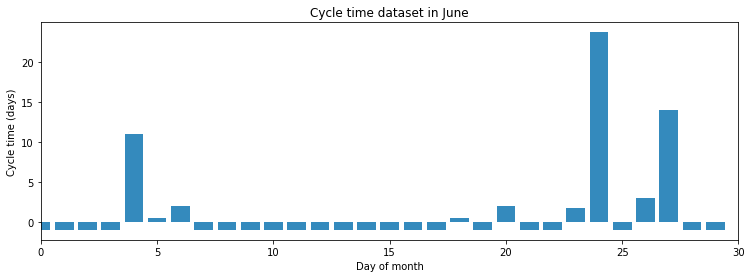

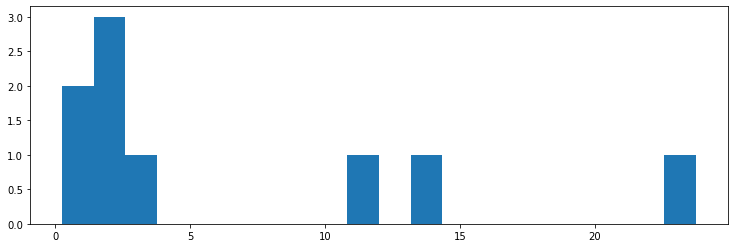

In [279]:
data = cycleObservationsJune.loc[cycleObservationsJune['cycleTime']>-2,'cycleTime']
_= plt.bar(np.arange(len(data)), data, color="#348ABD")
_= plt.xlabel("Day of month")
_= plt.ylabel("Cycle time (days)")
_= plt.title("Cycle time dataset in June")
_= plt.xlim(0, len(data))
#plt.legend();
_= plt.show()

# figsize(12.5, 4)
#cycleObservationsJune.head()
_= plt.hist(data, bins=20, range=(0.25,data.max()))
#plt.legend();

In [254]:
#masked_values = np.ma.masked_equal(cycleObservationsJune, value=None)
masked_values_June = np.ma.masked_array(cycleObservationsJune.cycleTime, mask=cycleObservationsJune.cycleTime==-999)
masked_values_June

masked_array(data=[--, --, --, --, 11.0, 0.5, 2.0, --, --, --, --, --, --,
                   --, --, --, --, --, 0.5, --, 2.0, --, --, 1.75, 23.75,
                   --, 3.0, 14.0, --, --],
             mask=[ True,  True,  True,  True, False, False, False,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True, False,  True, False,  True,  True, False,
                   False,  True, False, False,  True,  True],
       fill_value=1e+20)

No handles with labels found to put in legend.


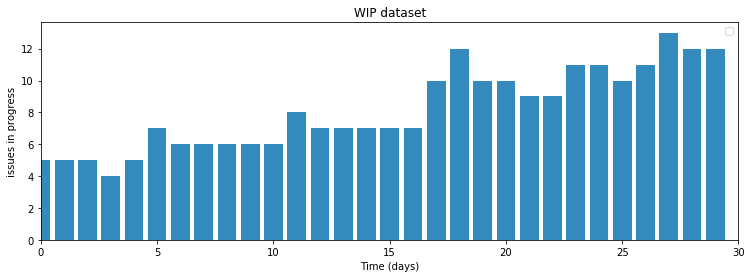

In [255]:
data = wipObservationsJune.SP_count
plt.bar(np.arange(len(data)), data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("issues in progress")
plt.title("WIP dataset")
plt.xlim(0, len(data))
plt.legend();

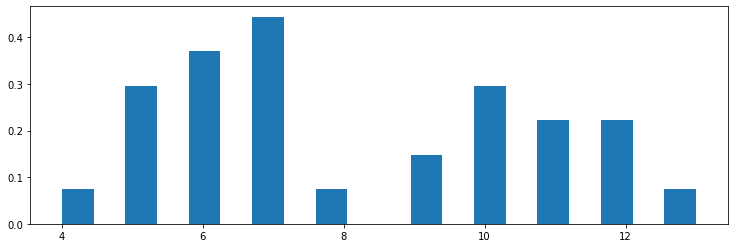

In [256]:
figsize(12.5, 4)
_=plt.hist(wipObservationsJune.SP_count, bins=20, histtype="stepfilled", density=True)

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# #p = stats.poisson.pmf(x, mu)
# #plt.plot(x, p, 'k', linewidth=2)
# plt.title("Artificial wip histogram")
# plt.show()

#print("wip mean", wipData.mean())

In [257]:
# # Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
# with pm.Model() as model_1:

#     troughput = pm.Normal("troughput", 1,0.5)
    
    
    
    
#     #mu_cycle = pm.Normal("mu_cycle", 5, 2)
#     #sigma_cycle = pm.Uniform("sigma_cycle", 0, 5)
    
#     mu_cycle = pm.Poisson("mu_cycle", 5, observed = cycleObservationsJune.cycleTime)
#     mu_wip = pm.Deterministic("mu_wip", troughput * mu_cycle)
#     sigma_wip = pm.Uniform('sigma_wip', 0,10)

#     wip = pm.Normal("wip", mu=mu_wip, sigma=sigma_wip, observed=wipObservationsJune.SP_count)
    
# #     mu_delivered = pm.Deterministic("mu_delivered", finishedItemsJuly.day / troughput )
# #     delivered = pm.Poisson("delivered", mu_delivered, observed=finishedItemsJuly.finishedCount)
    
    
#     trace = pm.sample(10000, tune=1000) 
    
    

#     # To be explained in chapter 3.
# #     step = pm.Metropolis()
# #     trace = pm.sample(10000, step=step)
# #     burned_trace=trace[1000:]

In [258]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model_2:

    troughput = pm.Normal("troughput", 1,0.5)
    
    
    
    
    #mu_cycle = pm.Normal("mu_cycle", 5, 2)
    #sigma_cycle = pm.Uniform("sigma_cycle", 0, 5)
    
    mu_cycle = pm.Poisson("mu_cycle", 5, observed = masked_values_June)
    mu_wip = pm.Deterministic("mu_wip", troughput * mu_cycle)
    sigma_wip = pm.Uniform('sigma_wip', 0,10)

    wip = pm.Normal("wip", mu=mu_wip, sigma=sigma_wip, observed=wipObservationsJune.SP_count)
    mu_eta_workDays = pm.Deterministic("mu_eta_workDays", 22 / troughput)
    sigma_eta_workdays = pm.Normal("sigma_eta_workdays", 2, 10)
    eta_workdays = pm.Normal("eta_workdays", mu = mu_eta_workDays, sigma = sigma_eta_workdays)
    

    
#     mu_delivered = pm.Deterministic("mu_delivered", finishedItemsJuly.day / troughput )
#     delivered = pm.Poisson("delivered", mu_delivered, observed=finishedItemsJuly.finishedCount)
    
    
    trace = pm.sample(20000, tune=5000) 
    
    

    # To be explained in chapter 3.
#     step = pm.Metropolis()
#     trace = pm.sample(10000, step=step)
#     burned_trace=trace[1000:]

/miniconda3/envs/bayes-env/lib/python3.7/site-packages/pymc3/model.py:1430: ImputationWarning: Data in mu_cycle contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [eta_workdays, sigma_eta_workdays, sigma_wip, troughput]
>Metropolis: [mu_cycle_missing]
Sampling 4 chains, 21,822 divergences: 100%|██████████| 100000/100000 [01:21<00:00, 1222.77draws/s]
There were 5597 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5480 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5749 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4995 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


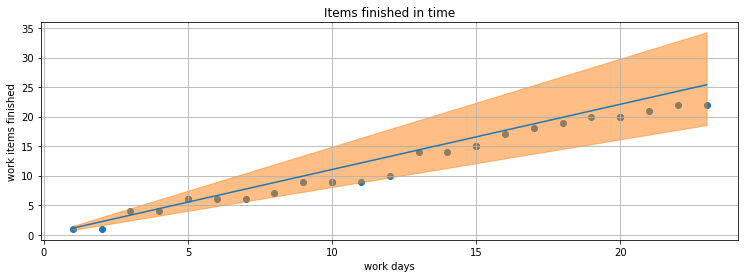

In [259]:
import arviz as az

items_avg = np.linspace(1, finishedItemsJuly['work_day'].max(), 100)

#mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,0] * R_avg[:,None]
mu_pred =  items_avg[:,None] / trace['troughput'][::400]
#mu_pred =  finishedItemsJuly['work_day'][:, None] / trace['troughput'][::400]

#mu_calc = items_avg[:,None] / troughput_july

#print(mu_pred.shape)
#eta_ = stats.norm.rvs(mu_pred, trace['sigma_timeToFinish'][::400])


# mu_pred = mu_pred[::20]
# items_avg = items_avg[::20]


plt.scatter(finishedItemsJuly.work_day, finishedItemsJuly['cumsum'])
plt.plot(items_avg, mu_pred.mean(1), 'C0')
#plt.plot(items_avg, mu_calc, 'C1', color='green')
plt.grid()
az.plot_hpd(items_avg, mu_pred.T)
#az.plot_hpd(items_avg, eta_.T)

plt.xlabel('work days')
plt.ylabel('work items finished')
plt.title('Items finished in time');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x140f1a630>],
      dtype=object)

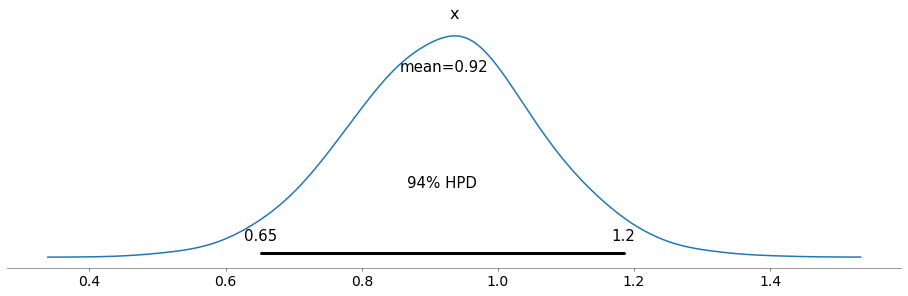

In [260]:
pm.plot_posterior( trace['troughput'], var_names= ['~mu_wip'])

In [171]:
trace['troughput'][::400].shape

(100,)

In [79]:
# print(len(finishedItemsJuly.day))
# print(len(finishedItemsJuly['cumsum']))

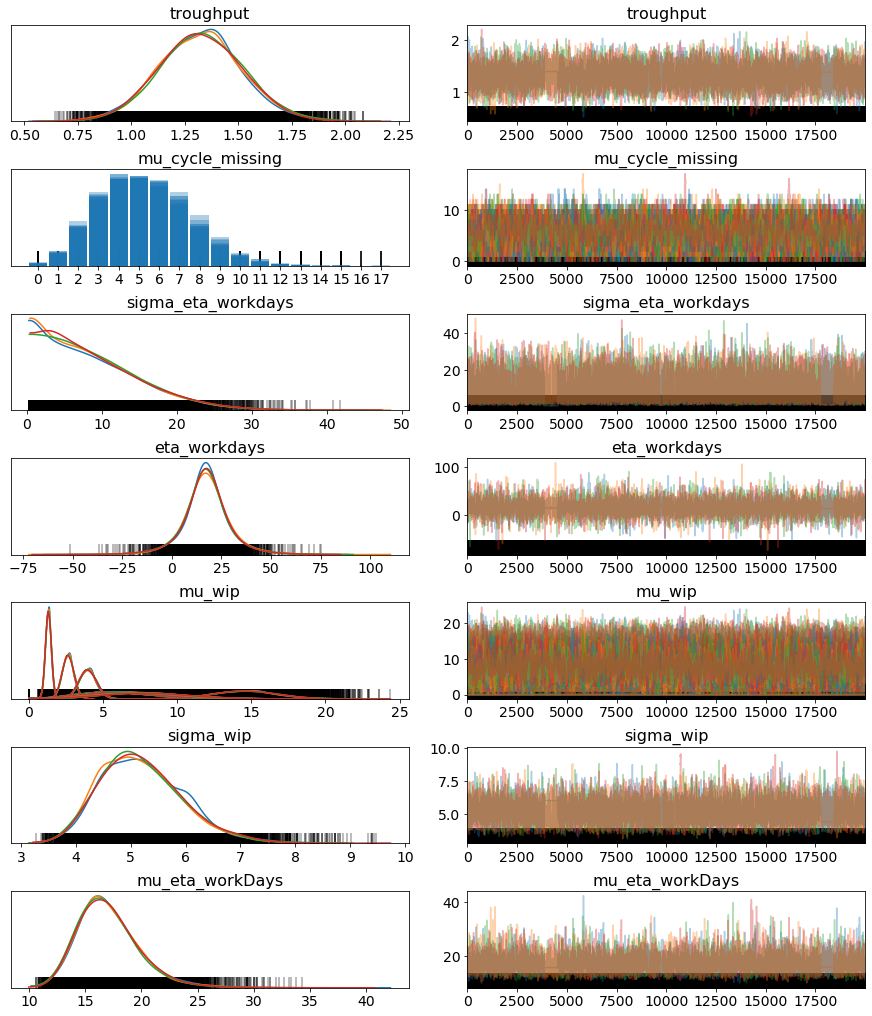

In [145]:
_=pm.traceplot(trace)

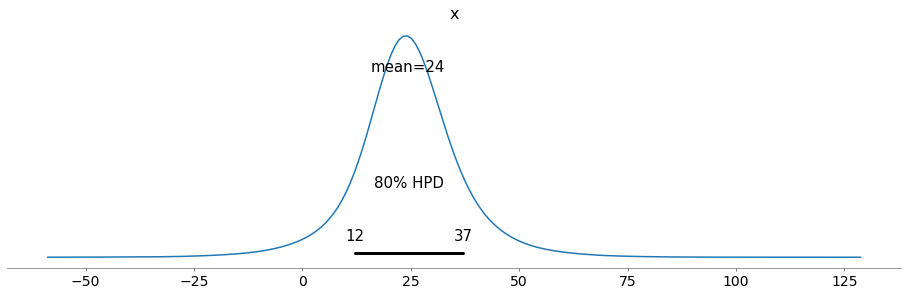

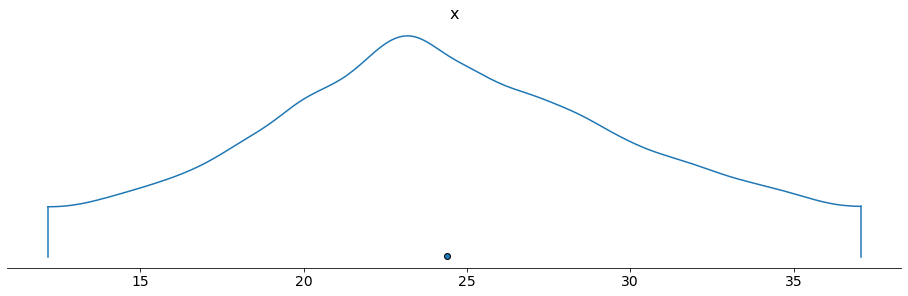

In [261]:
ax, = pm.plot_posterior( trace['eta_workdays'], credible_interval=0.8)
ax, = pm.densityplot( trace['eta_workdays'], credible_interval=0.80)
#ax.set_xlim(-5, 30000)

No handles with labels found to put in legend.


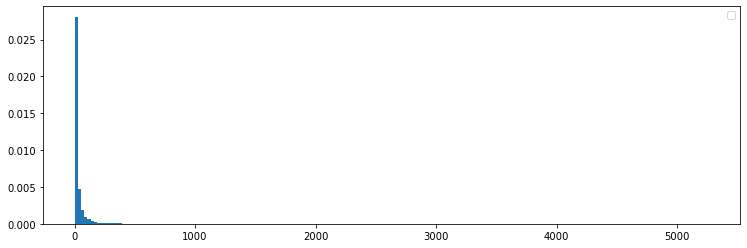

In [195]:
plt.hist(burned_trace['timeToFinish'], bins=200, histtype="stepfilled", density=True)
plt.legend();